<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/04_pytorch_custom_datasets_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 04. PyTorch Custom Datasets Exercises Template

Welcome to the 04. PyTorch Custom Datasets exercise template.

The best way to practice PyTorch code is to write more PyTorch code.

So read the original notebook and try to complete the exercises by writing code where it's required.

Feel free to reference the original resources whenever you need but should practice writing all of the code yourself.

## Resources

1. These exercises/solutions are based on [notebook 04 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/04_pytorch_custom_datasets/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/vsFMF9wqWx0).
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Mon Apr 29 07:35:15 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P8              13W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
# Import torch
import torch
from torch import nn

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

2.2.1+cu121


'cuda'

## 1. Our models are underperforming (not fitting the data well). What are 3 methods for preventing underfitting? Write them down and explain each with a sentence.

* augmetion
* add sclices


## 2. Recreate the data loading functions we built in [sections 1, 2, 3 and 4 of notebook 04](https://www.learnpytorch.io/04_pytorch_custom_datasets/). You should have train and test `DataLoader`'s ready to use.

In [3]:
from pathlib import Path
import zipfile
import requests

# 1. Get data

my_data_path = Path("my_data")

images_path = my_data_path / "my_pizza_steak_sushi"
zip_name = "my_pizza_steak_sushi.zip"

if images_path.is_dir():
    print(f"{images_path} exists")
else:
    print(f"Can't find {images_path}, I will create one ...")
    images_path.mkdir(parents=True, exist_ok=True)

with open(my_data_path / zip_name, "wb") as f:
    request = requests.get(
        "https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip"
    )
    print("downloading files ...")
    f.write(request.content)

with zipfile.ZipFile(my_data_path / zip_name) as f:
    print("Unzippping data ...")
    f.extractall(images_path)

Can't find my_data/my_pizza_steak_sushi, I will create one ...
downloading files ...
Unzippping data ...


In [4]:
# 2. Become one with the data
import os


def walk_through_dir(dir_path):
    """Walks through dir_path returning file counts of its contents."""
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(
            f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'."
        )


walk_through_dir(images_path)

There are 2 directories and 0 images in 'my_data/my_pizza_steak_sushi'.
There are 3 directories and 0 images in 'my_data/my_pizza_steak_sushi/test'.
There are 0 directories and 31 images in 'my_data/my_pizza_steak_sushi/test/sushi'.
There are 0 directories and 25 images in 'my_data/my_pizza_steak_sushi/test/pizza'.
There are 0 directories and 19 images in 'my_data/my_pizza_steak_sushi/test/steak'.
There are 3 directories and 0 images in 'my_data/my_pizza_steak_sushi/train'.
There are 0 directories and 72 images in 'my_data/my_pizza_steak_sushi/train/sushi'.
There are 0 directories and 78 images in 'my_data/my_pizza_steak_sushi/train/pizza'.
There are 0 directories and 75 images in 'my_data/my_pizza_steak_sushi/train/steak'.


In [5]:
# Setup train and testing paths

train_path = images_path / "train"
test_path = images_path / "test"

train_path, test_path

(PosixPath('my_data/my_pizza_steak_sushi/train'),
 PosixPath('my_data/my_pizza_steak_sushi/test'))

[PosixPath('my_data/my_pizza_steak_sushi/test/sushi/499605.jpg'), PosixPath('my_data/my_pizza_steak_sushi/test/sushi/2521706.jpg'), PosixPath('my_data/my_pizza_steak_sushi/test/sushi/207578.jpg')]
my_data/my_pizza_steak_sushi/test/steak/3873283.jpg
steak
Random image path: my_data/my_pizza_steak_sushi/test/steak/3873283.jpg
Image class: steak
Image height: 512
Image width: 512


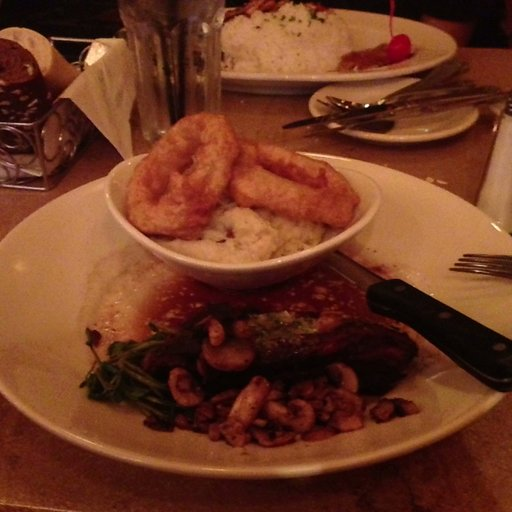

In [6]:
# Visualize an image
import random
from PIL import Image

# Set seed
random.seed(42)

# 1. Get all image paths (* means "any combination")
image_path_list = list(images_path.glob("*/*/*.jpg"))
print(image_path_list[:3])

# 2. Get random image path
random_image_path = random.choice(image_path_list)
print(random_image_path)

# 3. Get image class from path name
image_class = random_image_path.parent.stem
print(image_class)

# 4. Open image
img = Image.open(random_image_path)

# Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

Random image path: my_data/my_pizza_steak_sushi/test/steak/3873283.jpg
Image class: steak
Image height: 512
Image width: 512


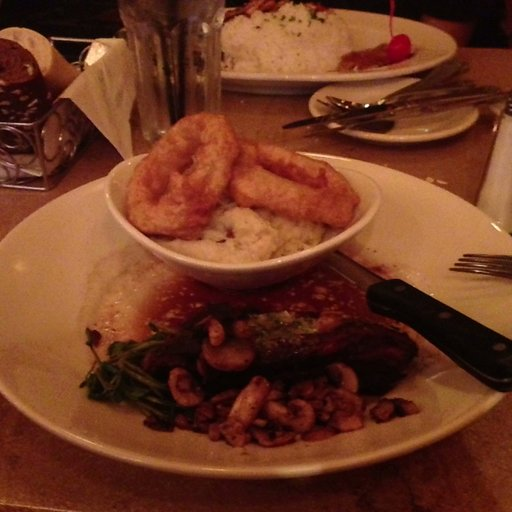

In [7]:
# Visualize an image
import random
from PIL import Image


def plot_random_image(path: Path, random_seed=42):

    random.seed(random_seed)

    image_path_list = list(path.glob("*/*/*.jpg"))

    random_image_path = random.choice(image_path_list)

    image_class = random_image_path.parent.stem

    img = Image.open(random_image_path)

    print(f"Random image path: {random_image_path}")
    print(f"Image class: {image_class}")
    print(f"Image height: {img.height}")
    print(f"Image width: {img.width}")

    return img, image_class


image_path, img_class = plot_random_image(images_path)

image_path

(-0.5, 511.5, 511.5, -0.5)

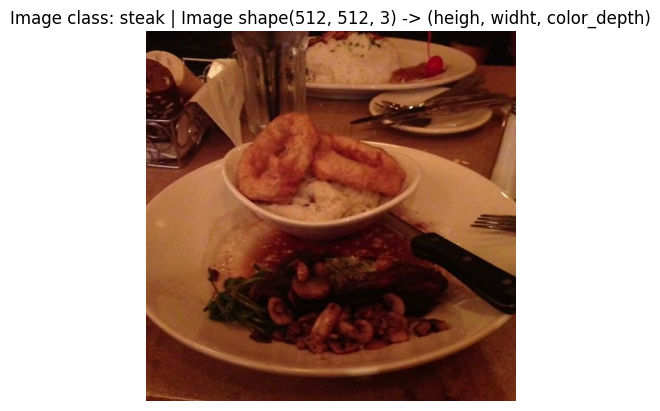

In [8]:
# Do the image visualization with matplotlib

import numpy as np
import matplotlib.pyplot as plt

img_ar = np.asarray(image_path)

plt.imshow(img_ar)
plt.title(
    f"Image class: {img_class} | Image shape{img_ar.shape} -> (heigh, widht, color_depth)"
)
plt.axis(False)

We've got some images in our folders.

Now we need to make them compatible with PyTorch by:
1. Transform the data into tensors.
2. Turn the tensor data into a `torch.utils.data.Dataset` and later a `torch.utils.data.DataLoader`.

3.1 Transforming data with torchvision.transforms

In [9]:
# Write transform for turning images into tensors
from torchvision import transforms

data_transform = transforms.Compose(
    [
        transforms.Resize(size=(64, 64)),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.ToTensor(),
    ]
)

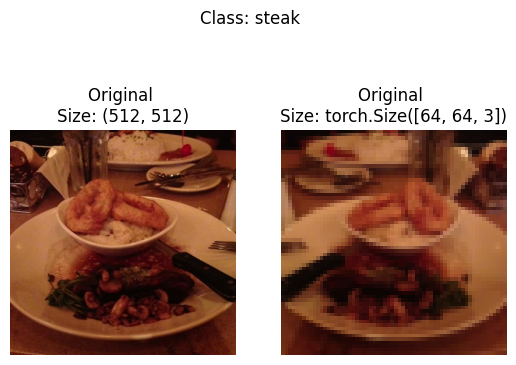

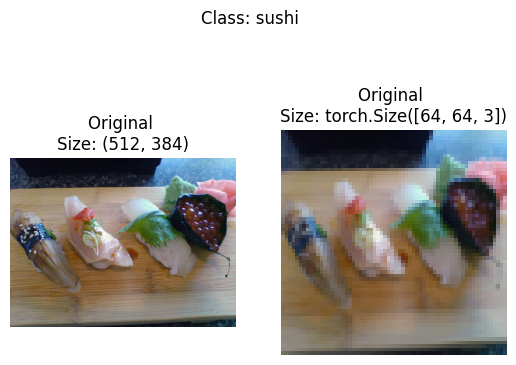

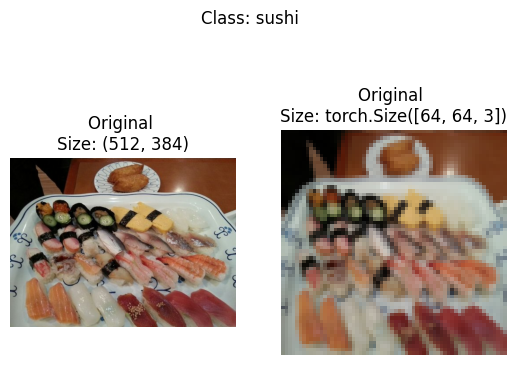

In [10]:
# Write a function to plot transformed images


def plot_transfomrmed_image(images_path, transform, n=3, seed=42):

    image_path_list = list(images_path.glob("*/*/*.jpg"))
    random.seed(seed)

    random_image_paths = random.sample(image_path_list, n)

    for image_path in random_image_paths:

        with Image.open(image_path) as f:

            fig, ax = plt.subplots(1, 2)

            ax[0].imshow(f)

            ax[0].axis(False)

            ax[0].set_title(f"Original \nSize: {f.size}")

            tr_img = transform(f).permute(1, 2, 0)

            ax[1].imshow(tr_img)

            ax[1].axis(False)

            ax[1].set_title(f"Original \nSize: {tr_img.shape}")

            fig.suptitle(f"Class: {image_path.parent.stem}")


plot_transfomrmed_image(images_path, data_transform)

### Load image data using `ImageFolder`

In [11]:
# Use ImageFolder to create dataset(s)
from torchvision import datasets

train_data = datasets.ImageFolder(train_path, data_transform, target_transform=None)
test_data = datasets.ImageFolder(test_path, data_transform)

In [12]:
# Get class names as a list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [13]:
# Can also get class names as a dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [14]:
# Check the lengths of each dataset
len(train_data), len(test_data)

(225, 75)

In [15]:
# Turn train and test Datasets into DataLoaders
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_data, batch_size=1, num_workers=6, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=1, num_workers=6, shuffle=False)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [16]:
# How many batches of images are in our data loaders?
img, label = next(iter(train_dataloader))

print(f"Image shape: {img.shape} -> [batch_size, color_chanel, widht, height]")
print(f"Label shape: {label.shape}")

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_chanel, widht, height]
Label shape: torch.Size([1])


## 3. Recreate `model_0` we built in section 7 of notebook 04.

In [17]:
import torch
from torch import nn


class MyTinnyVGG(nn.Module):
    def __init__(
        self, input_shape, hidden_units, output_shape, *args, **kwargs
    ) -> None:
        super().__init__(*args, **kwargs)
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(
                in_channels=input_shape,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1,
            ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1,
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1,
            ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1,
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units * 16 * 16, out_features=output_shape),
        )

    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.classifier(x)
        return x

In [18]:
torch.manual_seed(42)
model_0 = MyTinnyVGG(
    input_shape=3, hidden_units=10, output_shape=len(train_data.classes)
).to(device)
model_0

MyTinnyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

## 4. Create training and testing functions for `model_0`.

In [19]:
def train_step(
    model: torch.nn.Module,
    dataloader: torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module,
    optimizer: torch.optim.Optimizer,
):

    # Put the model in train mode
    model.train()

    # Setup train loss and train accuracy values

    train_loss, train_acc = 0, 0

    # Loop through data loader and data batches

    for batch, (X, y) in enumerate(dataloader):

        # Send data to target device

        X, y = X.to(device), y.to(device)

        # 1. Forward pass

        y_logits = model(X)

        # 2. Calculate and accumulate loss

        loss = loss_fn(y_logits, y)

        train_loss += loss.item()

        # 3. Optimizer zero grad

        optimizer.zero_grad()

        # 4. Loss backward

        loss.backward()

        # 5. Optimizer step

        optimizer.step()

        # Calculate and accumualte accuracy metric across all batches

        y_pred_class = torch.argmax(torch.softmax(y_logits, dim=1), dim=1)

        train_acc += (y_pred_class == y).sum().item() / len(y_logits)

    # print(batch)

    # Adjust metrics to get average loss and average accuracy per batch

    train_loss = train_loss / len(dataloader)

    train_acc = train_acc / len(dataloader)

    return train_loss, train_acc

In [20]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

In [21]:
def test_step(
    model: torch.nn.Module,
    dataloader: torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module,
):

    # Put model in eval mode

    model.eval()

    # Setup the test loss and test accuracy values

    test_loss, test_acc = 0, 0

    # Turn on inference context manager

    with torch.inference_mode():

        # Loop through DataLoader batches

        for batch, (X, y) in enumerate(dataloader):

            # Send data to target device

            X, y = X.to(device), y.to(device)

            # 1. Forward pass

            test_logits = model(X)

            # 2. Calculuate and accumulate loss

            loss = loss_fn(test_logits, y)

            test_loss += loss.item()

            # Calculate and accumulate accuracy

            test_pred = test_logits.argmax(dim=1)

            test_acc += (test_pred == y).sum().item() / len(test_pred)

    # Adjust metrics to get average loss and accuracy per batch

    test_loss = test_loss / len(dataloader)

    test_acc = test_acc / len(dataloader)

    return test_loss, test_acc

In [22]:
from tqdm.auto import tqdm


def train(
    model: torch.nn.Module,
    train_dataloader: torch.utils.data.DataLoader,
    test_dataloader: torch.utils.data.DataLoader,
    optimizer: torch.optim.Optimizer,
    loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
    epochs: int = 5,
    verbose=True,
):

    # Create results dictionary
    results = {"train_loss": [], "train_acc": [], "test_loss": [], "test_acc": []}

    # Loop through the training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        # Train step
        train_loss, train_acc = train_step(
            model=model,
            dataloader=train_dataloader,
            loss_fn=loss_fn,
            optimizer=optimizer,
        )
        # Test step
        test_loss, test_acc = test_step(
            model=model, dataloader=test_dataloader, loss_fn=loss_fn
        )

        if verbose:
            # Print out what's happening
            print(
                f"Epoch: {epoch+1} | "
                f"train_loss: {train_loss:.4f} | "
                f"train_acc: {train_acc:.4f} | "
                f"test_loss: {test_loss:.4f} | "
                f"test_acc: {test_acc:.4f}"
            )

        # Update the results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # Return the results dictionary
    return results

## 5. Try training the model you made in exercise 3 for 5, 20 and 50 epochs, what happens to the results?
* Use `torch.optim.Adam()` with a learning rate of 0.001 as the optimizer.

In [23]:
def plot_results(results):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.plot(results["train_loss"], label="train")
    plt.plot(results["test_loss"], label="test")
    plt.title("Loss")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(results["train_acc"], label="train")
    plt.plot(results["test_acc"], label="test")
    plt.title("Acciracy")
    plt.legend()


def get_model_0(seed=42):
    torch.manual_seed(seed)
    model = MyTinnyVGG(
        input_shape=3, hidden_units=10, output_shape=len(train_data.classes)
    ).to(device)
    return model


def get_model_1(seed=42):
    torch.manual_seed(seed)
    model = MyTinnyVGG(
        input_shape=3, hidden_units=20, output_shape=len(train_data.classes)
    ).to(device)
    return model


def train_model(model, epochs, seed=42):

    torch.manual_seed(seed=seed)
    torch.cuda.manual_seed(seed=seed)

    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)

    print(
        f"Train_dataloader size: {len(train_dataloader.dataset)}\n Test_dataloader size: {len(test_dataloader.dataset)}"
    )
    resulst = train(
        model,
        train_dataloader=train_dataloader,
        test_dataloader=test_dataloader,
        optimizer=optimizer,
        loss_fn=loss_fn,
        epochs=epochs,
    )
    plot_results(results=resulst)

Train_dataloader size: 225
 Test_dataloader size: 75


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1108 | train_acc: 0.3156 | test_loss: 1.1006 | test_acc: 0.3333
Epoch: 2 | train_loss: 1.0996 | train_acc: 0.3156 | test_loss: 1.0913 | test_acc: 0.2933
Epoch: 3 | train_loss: 1.1048 | train_acc: 0.3156 | test_loss: 1.1005 | test_acc: 0.3333
Epoch: 4 | train_loss: 1.0991 | train_acc: 0.3156 | test_loss: 1.0998 | test_acc: 0.3333
Epoch: 5 | train_loss: 1.1143 | train_acc: 0.4444 | test_loss: 1.0812 | test_acc: 0.4133


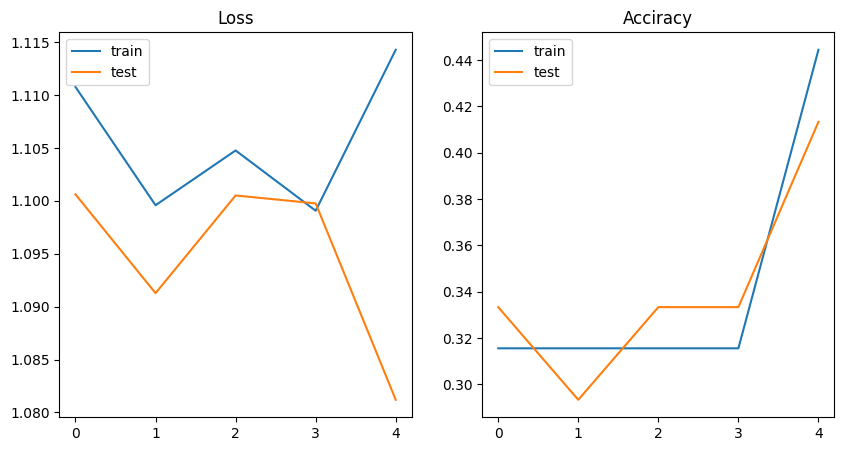

In [24]:
# Train for 5 epochs
model_0 = get_model_0()
train_model(model_0, epochs=5)

Train_dataloader size: 225
 Test_dataloader size: 75


  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1108 | train_acc: 0.3156 | test_loss: 1.1006 | test_acc: 0.3333
Epoch: 2 | train_loss: 1.0999 | train_acc: 0.3022 | test_loss: 1.1011 | test_acc: 0.3333
Epoch: 3 | train_loss: 1.0796 | train_acc: 0.4533 | test_loss: 1.0685 | test_acc: 0.4133
Epoch: 4 | train_loss: 0.9916 | train_acc: 0.5467 | test_loss: 1.0750 | test_acc: 0.4133
Epoch: 5 | train_loss: 0.9436 | train_acc: 0.6044 | test_loss: 0.9588 | test_acc: 0.5600
Epoch: 6 | train_loss: 0.8855 | train_acc: 0.5956 | test_loss: 1.0028 | test_acc: 0.4400
Epoch: 7 | train_loss: 0.8159 | train_acc: 0.6133 | test_loss: 1.0257 | test_acc: 0.4533
Epoch: 8 | train_loss: 0.8266 | train_acc: 0.6178 | test_loss: 1.0814 | test_acc: 0.4000
Epoch: 9 | train_loss: 0.7819 | train_acc: 0.6622 | test_loss: 1.0318 | test_acc: 0.4800
Epoch: 10 | train_loss: 0.7248 | train_acc: 0.6800 | test_loss: 1.1005 | test_acc: 0.4800
Epoch: 11 | train_loss: 0.7084 | train_acc: 0.7067 | test_loss: 1.0564 | test_acc: 0.5333
Epoch: 12 | train_l

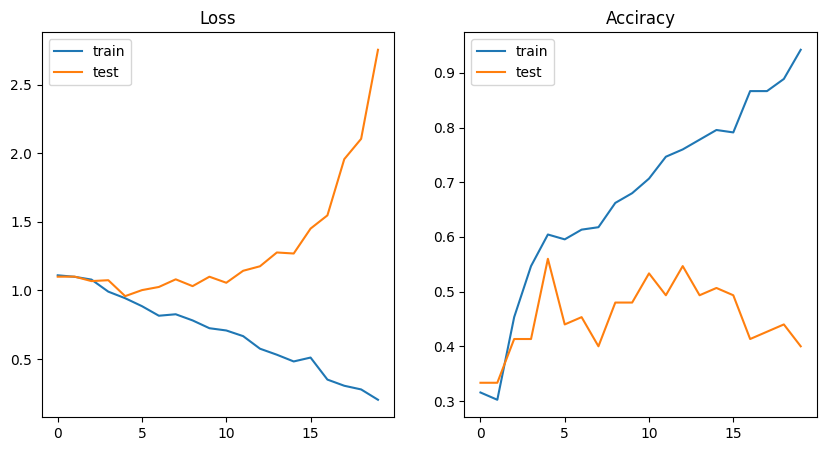

In [25]:
# Train for 20 epochs
model_0 = get_model_0()
train_model(model_0, epochs=20)

Train_dataloader size: 225
 Test_dataloader size: 75


  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1108 | train_acc: 0.3156 | test_loss: 1.1006 | test_acc: 0.3333
Epoch: 2 | train_loss: 1.0999 | train_acc: 0.3022 | test_loss: 1.1011 | test_acc: 0.3333
Epoch: 3 | train_loss: 1.0741 | train_acc: 0.4800 | test_loss: 1.0391 | test_acc: 0.4800
Epoch: 4 | train_loss: 0.9841 | train_acc: 0.5467 | test_loss: 1.0682 | test_acc: 0.4267
Epoch: 5 | train_loss: 0.9481 | train_acc: 0.6000 | test_loss: 0.9512 | test_acc: 0.5333
Epoch: 6 | train_loss: 0.8859 | train_acc: 0.6178 | test_loss: 0.9823 | test_acc: 0.4800
Epoch: 7 | train_loss: 0.8167 | train_acc: 0.6044 | test_loss: 1.0097 | test_acc: 0.4800
Epoch: 8 | train_loss: 0.8295 | train_acc: 0.6044 | test_loss: 1.0692 | test_acc: 0.4533
Epoch: 9 | train_loss: 0.7793 | train_acc: 0.6222 | test_loss: 1.0352 | test_acc: 0.4933
Epoch: 10 | train_loss: 0.7463 | train_acc: 0.6844 | test_loss: 0.9916 | test_acc: 0.5467
Epoch: 11 | train_loss: 0.7279 | train_acc: 0.7022 | test_loss: 1.0234 | test_acc: 0.4533
Epoch: 12 | train_l

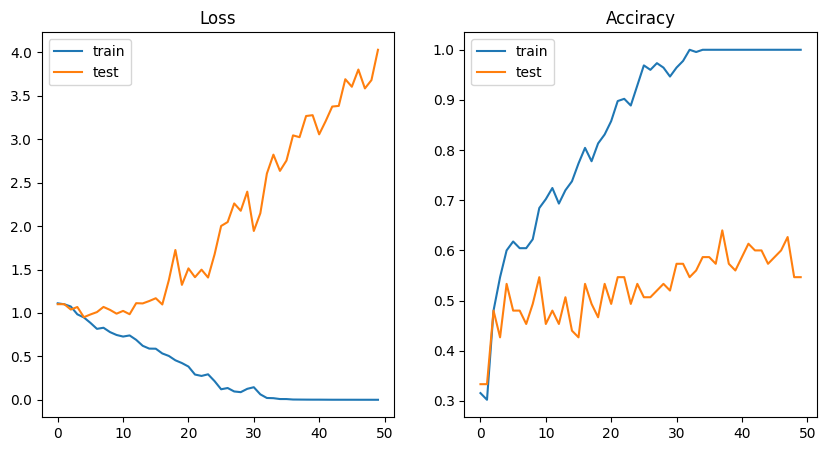

In [26]:
# Train for 50 epochs
model_0 = get_model_0()
train_model(model_0, epochs=50)

It looks like our model is starting to overfit towards the end (performing far better on the training data than on the testing data).

In order to fix this, we'd have to introduce ways of preventing overfitting.

## 6. Double the number of hidden units in your model and train it for 20 epochs, what happens to the results?

Train_dataloader size: 225
 Test_dataloader size: 75


  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1044 | train_acc: 0.3333 | test_loss: 1.0989 | test_acc: 0.4000
Epoch: 2 | train_loss: 1.0302 | train_acc: 0.4533 | test_loss: 1.0740 | test_acc: 0.4400
Epoch: 3 | train_loss: 0.9491 | train_acc: 0.5733 | test_loss: 0.9939 | test_acc: 0.4533
Epoch: 4 | train_loss: 0.9180 | train_acc: 0.5778 | test_loss: 1.0137 | test_acc: 0.4267
Epoch: 5 | train_loss: 0.8946 | train_acc: 0.6000 | test_loss: 0.9792 | test_acc: 0.5067
Epoch: 6 | train_loss: 0.8677 | train_acc: 0.6044 | test_loss: 0.9954 | test_acc: 0.4667
Epoch: 7 | train_loss: 0.8166 | train_acc: 0.6178 | test_loss: 1.0427 | test_acc: 0.4133
Epoch: 8 | train_loss: 0.8380 | train_acc: 0.6000 | test_loss: 1.0618 | test_acc: 0.4400
Epoch: 9 | train_loss: 0.8024 | train_acc: 0.6400 | test_loss: 1.0260 | test_acc: 0.5200
Epoch: 10 | train_loss: 0.7198 | train_acc: 0.7200 | test_loss: 1.0888 | test_acc: 0.5333
Epoch: 11 | train_loss: 0.7183 | train_acc: 0.7244 | test_loss: 1.0740 | test_acc: 0.4267
Epoch: 12 | train_l

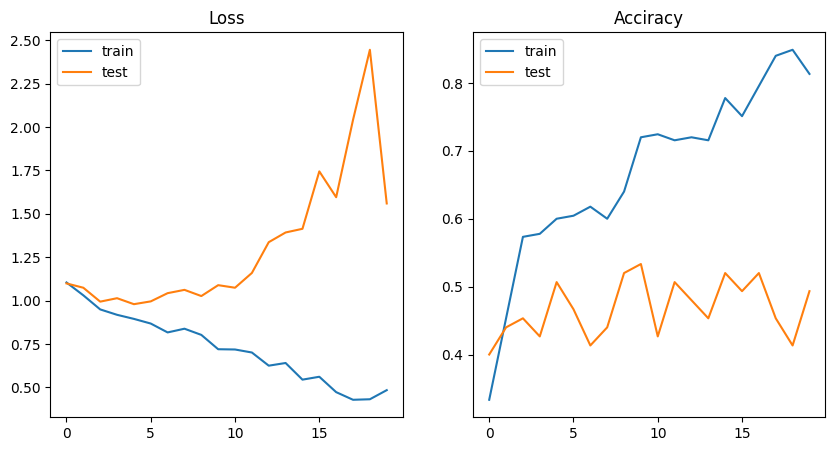

In [27]:
# Double the number of hidden units and train for 20 epochs
model_0 = get_model_1()
train_model(model_0, epochs=20)

It looks like the model is still overfitting, even when changing the number of hidden units.

To fix this, we'd have to look at ways to prevent overfitting with our model.

## 7. Double the data you're using with your model from step 6 and train it for 20 epochs, what happens to the results?
* **Note:** You can use the [custom data creation notebook](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/04_custom_data_creation.ipynb) to scale up your Food101 dataset.
* You can also find the [already formatted double data (20% instead of 10% subset) dataset on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/data/pizza_steak_sushi_20_percent.zip), you will need to write download code like in exercise 2 to get it into this notebook.

In [28]:
# Download 20% data for Pizza/Steak/Sushi from GitHub
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("my_data")
images_path = data_path / "pizza_steak_sushi_20_percent"

# If the image folder doesn't exist, download it and prepare it...
if images_path.is_dir():
    print(f"{images_path} directory exists.")
else:
    print(f"Did not find {images_path} directory, creating one...")
    images_path.mkdir(parents=True, exist_ok=True)

# Download pizza, steak, sushi data
with open(data_path / "pizza_steak_sushi_20_percent.zip", "wb") as f:
    request = requests.get(
        "https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip"
    )
    print("Downloading pizza, steak, sushi 20% data...")
    f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi_20_percent.zip", "r") as zip_ref:
    print("Unzipping pizza, steak, sushi 20% data...")
    zip_ref.extractall(images_path)

Did not find my_data/pizza_steak_sushi_20_percent directory, creating one...
Unzipping pizza, steak, sushi 20% data...


In [29]:
# See how many images we have
walk_through_dir(images_path)

There are 2 directories and 0 images in 'my_data/pizza_steak_sushi_20_percent'.
There are 3 directories and 0 images in 'my_data/pizza_steak_sushi_20_percent/test'.
There are 0 directories and 46 images in 'my_data/pizza_steak_sushi_20_percent/test/sushi'.
There are 0 directories and 46 images in 'my_data/pizza_steak_sushi_20_percent/test/pizza'.
There are 0 directories and 58 images in 'my_data/pizza_steak_sushi_20_percent/test/steak'.
There are 3 directories and 0 images in 'my_data/pizza_steak_sushi_20_percent/train'.
There are 0 directories and 150 images in 'my_data/pizza_steak_sushi_20_percent/train/sushi'.
There are 0 directories and 154 images in 'my_data/pizza_steak_sushi_20_percent/train/pizza'.
There are 0 directories and 146 images in 'my_data/pizza_steak_sushi_20_percent/train/steak'.


Excellent, we now have double the training and testing images...

In [30]:
# Create the train and test paths
train_data_20_percent_path = images_path / "train"
test_data_20_percent_path = images_path / "test"

train_data_20_percent_path, test_data_20_percent_path

(PosixPath('my_data/pizza_steak_sushi_20_percent/train'),
 PosixPath('my_data/pizza_steak_sushi_20_percent/test'))

In [31]:
# Turn the 20 percent datapaths into Datasets and DataLoaders
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader

simple_transform = transforms.Compose(
    [transforms.Resize((64, 64)), transforms.ToTensor()]
)

# Create datasets
train_data = ImageFolder(
    root=train_data_20_percent_path, transform=simple_transform, target_transform=None
)
test_data = ImageFolder(root=test_data_20_percent_path, transform=simple_transform)

# Create dataloaders

train_dataloader = DataLoader(dataset=train_data, batch_size=12, shuffle=True)
test_dataloader = DataLoader(dataset=test_data, batch_size=12, shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7eeeedd2e8f0>,
 <torch.utils.data.dataloader.DataLoader at 0x7eefd030b760>)

Train_dataloader size: 450
 Test_dataloader size: 150


  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1016 | train_acc: 0.3399 | test_loss: 1.0749 | test_acc: 0.3782
Epoch: 2 | train_loss: 1.0230 | train_acc: 0.5000 | test_loss: 0.9587 | test_acc: 0.4551
Epoch: 3 | train_loss: 0.9199 | train_acc: 0.5263 | test_loss: 0.9232 | test_acc: 0.5321
Epoch: 4 | train_loss: 0.8529 | train_acc: 0.6425 | test_loss: 0.9206 | test_acc: 0.5769
Epoch: 5 | train_loss: 0.8420 | train_acc: 0.6162 | test_loss: 0.9321 | test_acc: 0.5000
Epoch: 6 | train_loss: 0.8296 | train_acc: 0.6338 | test_loss: 0.9466 | test_acc: 0.5256
Epoch: 7 | train_loss: 0.8093 | train_acc: 0.6294 | test_loss: 0.9117 | test_acc: 0.5705
Epoch: 8 | train_loss: 0.7428 | train_acc: 0.6864 | test_loss: 0.9003 | test_acc: 0.5769
Epoch: 9 | train_loss: 0.6897 | train_acc: 0.7149 | test_loss: 0.8794 | test_acc: 0.6218
Epoch: 10 | train_loss: 0.6269 | train_acc: 0.7368 | test_loss: 0.9994 | test_acc: 0.5641
Epoch: 11 | train_loss: 0.5746 | train_acc: 0.7478 | test_loss: 1.0762 | test_acc: 0.5897
Epoch: 12 | train_l

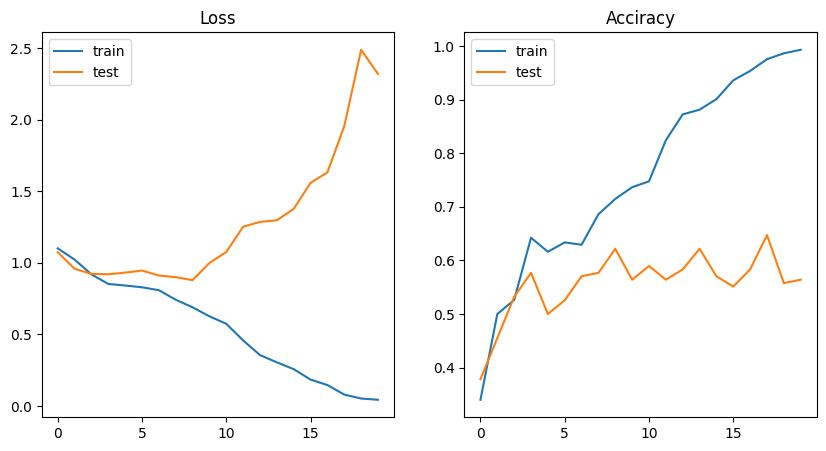

In [32]:
# Train a model with increased amount of data
model_0 = get_model_1()
train_model(model_0, epochs=20)

## 8. Make a prediction on your own custom image of pizza/steak/sushi (you could even download one from the internet) with your trained model from exercise 7 and share your prediction.
* Does the model you trained in exercise 7 get it right?
* If not, what do you think you could do to improve it?